In [1]:
import sqlite3
import pandas as pd


In [4]:
connection = sqlite3.connect("../data/online_retail.db")
df = pd.read_sql_query("SELECT * FROM customer_churn_features;", connection)
connection.close()

df.head()


,CustomerID,num_orders,total_spent,avg_order_value,first_purchase_date,last_purchase_date,tenure_days,recency_days,avg_days_between_orders,days_since_last_purchase,churned
0,12346.0,2,0.00,0.00,2011-01-18 10:01:00,2011-01-18 10:17:00,0.011111,325.571528,0.011111,325.106250,1
1,12347.0,7,4310.00,615.71,2010-12-07 14:57:00,2011-12-07 15:52:00,365.038194,2.338889,60.839699,1.873611,0
2,12348.0,4,1797.24,449.31,2010-12-16 19:09:00,2011-09-25 13:13:00,282.752778,75.449306,94.250926,74.984028,0
3,12349.0,1,1757.55,1757.55,2011-11-21 09:51:00,2011-11-21 09:51:00,0.000000,18.589583,NaN,18.124306,0
4,12350.0,1,334.40,334.40,2011-02-02 16:01:00,2011-02-02 16:01:00,0.000000,310.332639,NaN,309.867361,1


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features and target
X = df.drop(columns=['CustomerID', 'churned'])
y = df['churned']

X = X.select_dtypes(include=['number'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9988571428571429

Confusion Matrix:
 [[709   1]
 [  0 165]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       710
           1       0.99      1.00      1.00       165

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [15]:
import joblib

joblib.dump(model, '../models/churn_model.pkl')
print("Model saved to models/churn_model.pkl")

Model saved to models/churn_model.pkl


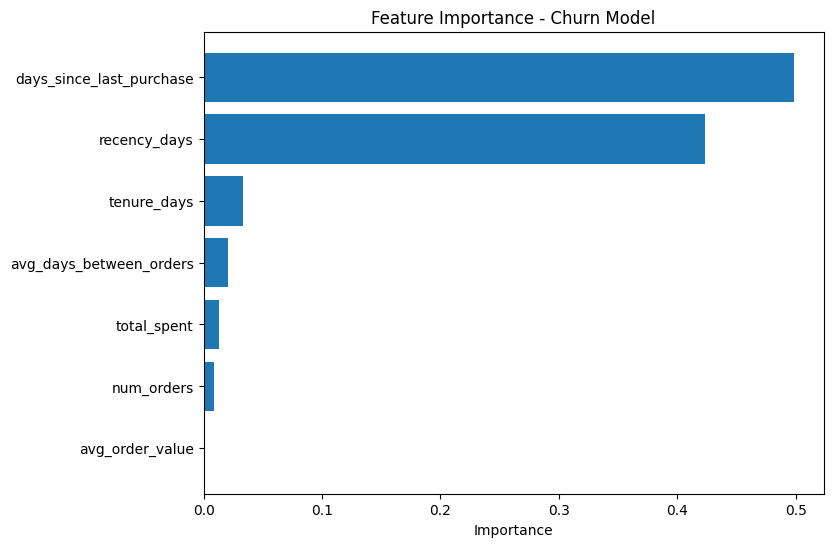

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
features = X.columns

# Sort and plot
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Churn Model')
plt.gca().invert_yaxis()
plt.show()


In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data/online_retail.db")
df = pd.read_sql_query("SELECT * FROM customer_churn_features LIMIT 5;", conn)
print(df.columns.tolist())
conn.close()


OperationalError: unable to open database file

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/online_retail.db")
df = pd.read_sql_query("SELECT * FROM customer_churn_features LIMIT 5;", conn)
print(df.columns.tolist())
conn.close()


['CustomerID', 'num_orders', 'total_spent', 'avg_order_value', 'first_purchase_date', 'last_purchase_date', 'tenure_days', 'recency_days', 'avg_days_between_orders', 'days_since_last_purchase', 'churned']
